In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import PredefinedSplit
from src.datasets_generator import DatasetsGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import PredefinedSplit

## 1. Generating Dataset for Regression Exercise

In [3]:
dg = DatasetsGenerator()

In [4]:
X_df, y_df, coeffs = dg.get_linear_regression_dataset(
    rows_num=2_000, regressors_num=20, informative_regressors_num=6, bias=10, sigma=15
)

In [59]:
coeffs

array([ 0.        ,  0.        ,  0.        ,  3.35557988, 95.25373441,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 46.43393595, 91.23588129,
        0.        ,  3.81648162,  0.        ,  0.13264924,  0.        ])

In [60]:
bias=10

In [6]:
data = pd.concat([X_df, y_df], axis=1)

In [7]:
data.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,y
0,0.281807,-1.013064,-0.464530,1.128628,-0.322016,0.207940,-0.977155,0.853076,0.481521,-1.368094,...,0.766394,0.383160,-0.922427,0.905899,-2.052692,-0.121547,0.964364,-0.690062,0.210031,17.543733
1,0.632521,-0.607918,-1.350280,-0.212675,0.071229,-1.173642,-0.610833,0.508243,0.740976,0.037786,...,-0.614791,-0.704730,-1.033361,0.015746,-1.037342,-0.718039,-1.693400,0.090939,0.862473,-19.208534
2,0.959492,0.349263,-0.063857,-0.756680,1.181577,-0.349649,1.997376,-0.416282,-0.295400,1.389117,...,0.950390,-1.327481,-1.777145,0.515452,0.447343,-0.227972,0.934361,-0.067244,-1.194174,124.597658


In [19]:
nas_check = data.isna().sum(axis=0)
print(nas_check[nas_check > 0])

Series([], dtype: int64)


## 2. Quick Look at Pearson's Correlation of Regressors with Regressand

In [43]:
corrs = X_df.corrwith(y_df["y"], axis=0)
corrs = corrs.sort_values(ascending=False)

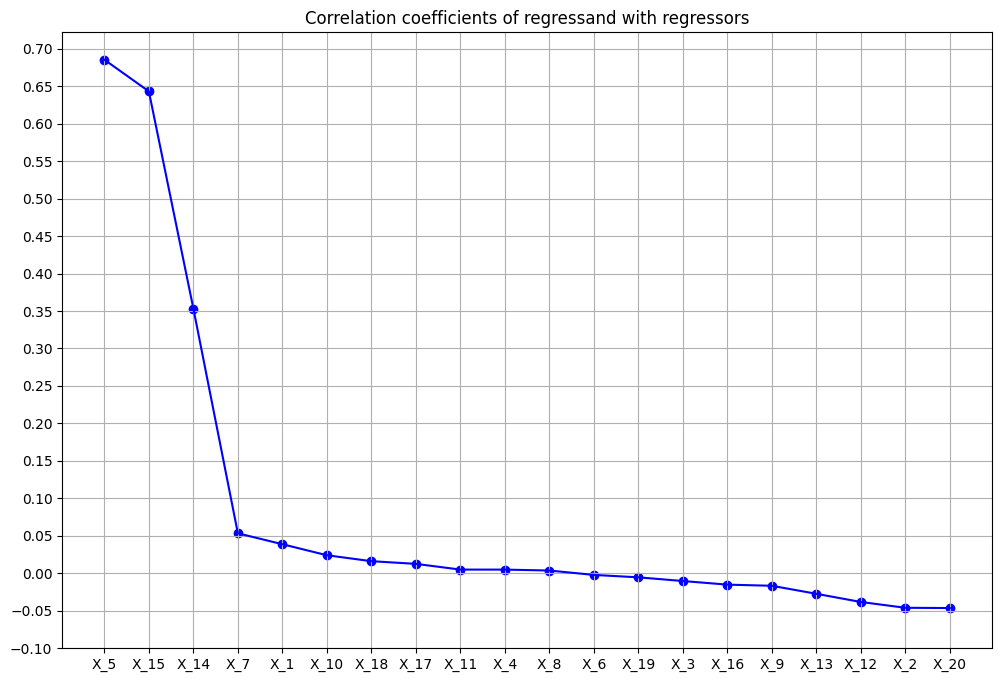

In [58]:
fig_corrs = plt.figure(figsize=(12, 8))
ax_corrs = fig_corrs.add_subplot(1, 1, 1)
x_ticks = list(range(1, len(corrs) + 1))
ax_corrs.plot(x_ticks, corrs, color="blue")
ax_corrs.scatter(x_ticks, corrs, color="blue")
ax_corrs.set_title("Correlation coefficients of regressand with regressors")
ax_corrs.grid()
ax_corrs.set_xticks(x_ticks)
ax_corrs.set_xticklabels(corrs.index)
y_ticks = np.arange(-0.1, 0.71, 0.05)
ax_corrs.set_yticks(y_ticks)

## 3. Running the Usual Linear Regression with All Regressors

In [64]:
lr = LinearRegression()
lr.fit(X_df, y_df)

LinearRegression()

In [66]:
print("coefficients of regressors: ", lr.coef_)
print("intercept: ", lr.intercept_)

coefficients of regressors:  [[-5.80727152e-01  6.27362474e-01 -5.88494775e-02  2.64798491e+00
   9.49564703e+01  5.08697363e-01  2.01062831e-01  3.12946237e-01
  -4.22938521e-01 -1.41043153e-01 -1.54559266e-01 -3.42741094e-01
   2.40634861e-01  4.65178750e+01  9.14479952e+01  3.11308330e-01
   4.08515098e+00 -5.52919250e-01  1.91847376e-01 -5.83154976e-01]]
intercept:  [10.00884005]


## 4. Running Ridge Regression

In [69]:
X_df.shape

(2000, 20)

In [70]:
train_test_split = PredefinedSplit([0] * 1500 + [-1] * 500)

In [82]:
alphas = np.concatenate([np.arange(0.1, 1, 0.1), np.arange(1, 11, 1), np.arange(10, 100, 10)])
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  2. ,
        3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 10. , 20. , 30. ,
       40. , 50. , 60. , 70. , 80. , 90. ])

In [86]:
ridge_cv = RidgeCV(
    alphas=alphas,
    fit_intercept=True,
    cv=train_test_split,
    scoring="r2"
)

In [87]:
ridge_cv.fit(X_df, y_df)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  2. ,
        3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 10. , 20. , 30. ,
       40. , 50. , 60. , 70. , 80. , 90. ]),
        cv=PredefinedSplit(test_fold=array([ 0,  0, ..., -1, -1])),
        scoring='r2')

In [88]:
ridge_cv.best_score_

0.9887749665462805

In [92]:
best_coefficients = ridge_cv.coef_
best_intercept = ridge_cv.intercept_
best_coefficients

array([[-5.76993530e-01,  6.23306149e-01, -5.95688092e-02,
         2.64592652e+00,  9.49097529e+01,  5.07999403e-01,
         2.04975042e-01,  3.12944859e-01, -4.23494390e-01,
        -1.39137144e-01, -1.54287485e-01, -3.45070199e-01,
         2.38278507e-01,  4.64967643e+01,  9.14008483e+01,
         3.10160921e-01,  4.08187869e+00, -5.51565978e-01,
         1.91237010e-01, -5.85733955e-01]])

In [93]:
ridge_cv.alpha_

1.0